<a href="https://colab.research.google.com/github/Ayushraj6202/dog-cat-classifier/blob/main/dog_vs_cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data importing from kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:13<00:00, 83.6MB/s]
100% 1.06G/1.06G [00:13<00:00, 86.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("dogs-vs-cats.zip",'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,BatchNormalization,Dropout
from keras.models import Sequential

Generators - it will create batch of images over will our model will be training.

It is helpful to process large amount of data

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalisation

In [ ]:
def process(image,label):
    image=tf.cast(image/255.0,tf.float32)
    return image,label

train_dataset=train_dataset.map(process)
validation_dataset=validation_dataset.map(process)

In [ ]:
model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history= model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 82s 125ms/step - loss: 0.8279 - accuracy: 0.6038 - val_loss: 1.0269 - val_accuracy: 0.5266
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5605 - accuracy: 0.7136 - val_loss: 0.6122 - val_accuracy: 0.7300
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4599 - accuracy: 0.7857 - val_loss: 0.4975 - val_accuracy: 0.7622
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4079 - accuracy: 0.8171 - val_loss: 1.1514 - val_accuracy: 0.5748
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3713 - accuracy: 0.8400 - val_loss: 0.4866 - val_accuracy: 0.7858
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2667 - accuracy: 0.8877 - val_loss: 0.6105 - val_accuracy: 0.7912
Epoch 7/10
625/625 [==============================] - 83s 131ms/step - loss: 0.1931 - accuracy: 0.9208 - val_loss: 0.7095 - val_ac

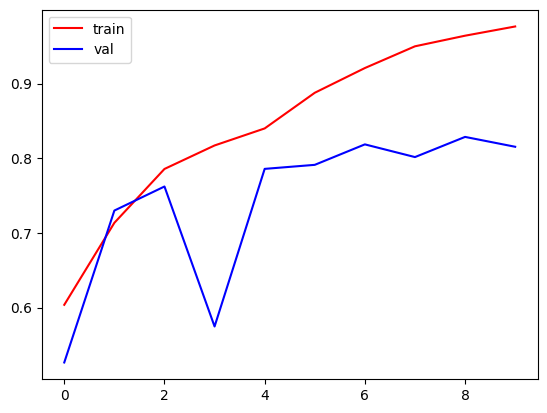

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='val')
plt.legend()
plt.show()

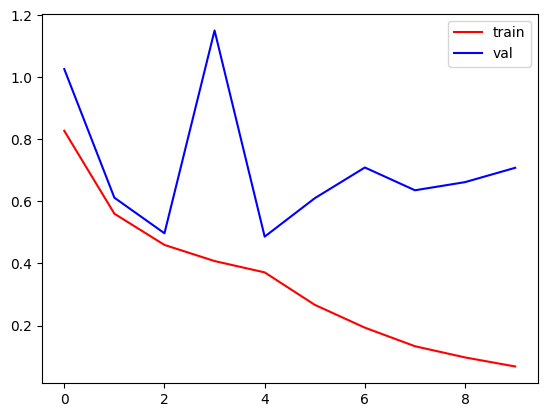

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='val')
plt.legend()

In [ ]:
lst=['cat','dog']

In [ ]:
import cv2

In [ ]:
img1=cv2.imread("/content/cat1.jpg")
img2=cv2.imread("/content/dog1.jpeg")
img3=cv2.imread("/content/dog1.jpg")

In [ ]:
def ShowResult(img):
    plt.imshow(img)
    img=img/255
    img=cv2.resize(img,(256,256))
    input=img.reshape((1,256,256,3))
    pred= model.predict(input)[0][0]
    print(pred)
    if pred>0.75:
        pred=1
    else :
        pred=0

    print("Prediction is "+lst[pred])
    return

1/1 [==============================] - 0s 23ms/step
0.0044648983
Prediction is cat


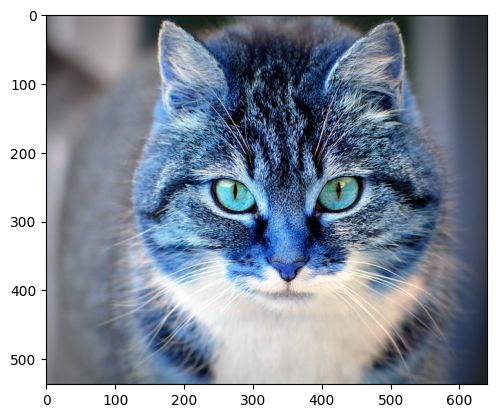

In [ ]:
ShowResult(img1)

1/1 [==============================] - 0s 31ms/step
0.984937
Prediction is dog


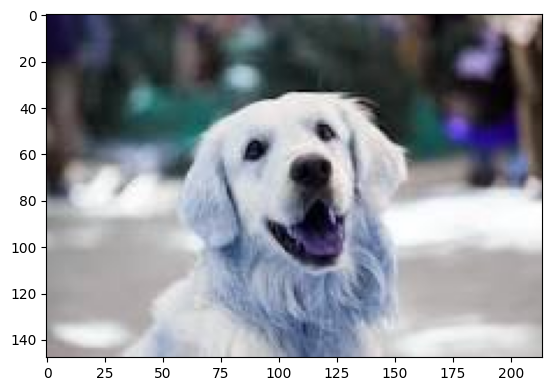

In [ ]:
ShowResult(img2)

1/1 [==============================] - 0s 42ms/step
0.8953037
Prediction is dog


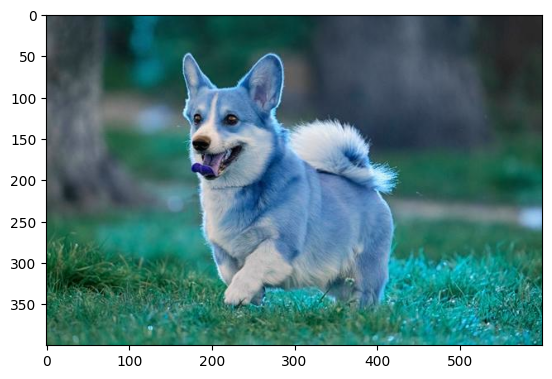

In [ ]:
ShowResult(img3)